In [122]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract
from tesserocr import PyTessBaseAPI
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [123]:
def prepare(image, name, crop=None, brightness_border = 120, scale=0):
    if(crop!=None):
        image = image.crop(crop)
        image.save(name)
    bw_name = name[0:-4] + '_bw.jpg'
    column = image
    gray = column.convert('L')
    blackwhite = gray.point(lambda x: 0 if x < brightness_border else 255, '1')
    newimg1 = Image.new('RGB', size=[x*(scale*2 + 1) for x in blackwhite.size], color='white')
    newimg1.paste(blackwhite, [x*scale for x in blackwhite.size])
    newimg1.save(bw_name)
    return blackwhite

def show(image, crop, color="green", width=3):
    d = ImageDraw.Draw(image)
    d.rectangle(crop, outline=color, width=width)
    image.show()

In [135]:
def birth_date(brightness_border=150, scale=0):
    base = Image.open('final_pass15.jpg').convert('RGB')

    birth_date_crop=[x//2 for x in base.size]*2;
    #print(birth_date_crop)
    birth_date_crop[0]+=-1120
    birth_date_crop[1]+=775
    birth_date_crop[2]+=320
    birth_date_crop[3]+=895
    #show(base, birth_date_crop)
    prepare(base, "birth_date.jpg", birth_date_crop, brightness_border=brightness_border, scale=scale)
    return "birth_date_bw.jpg"

In [136]:
def birth_place(brightness_border=150, scale=0):
    base = Image.open('final_pass15.jpg').convert('RGB')

    birth_place_crop=[x//2 for x in base.size]*2;
    #print(birth_place_crop)
    birth_place_crop[0]+=-30
    birth_place_crop[1]+=860
    birth_place_crop[2]+=1050
    birth_place_crop[3]+=1060
    #print(birth_place_crop)
    #show(base, birth_place_crop)
    prepare(base, "birth_place.jpg", birth_place_crop, brightness_border=brightness_border, scale=scale)
    return "birth_place_bw.jpg"

In [137]:
def personal_number(brightness_border=150, scale=0):
    base = Image.open('final_pass15.jpg').convert('RGB')

    personaln_crop=[x//2 for x in base.size]*2;
    #print(personaln_crop)
    personaln_crop[0]+=370
    personaln_crop[1]+=760
    personaln_crop[2]+=1120
    personaln_crop[3]+=860
    #print(personaln_crop)
    #show(base, personaln_crop)
    prepare(base, "personal_number.jpg", personaln_crop, brightness_border=brightness_border, scale=scale)
    return "personal_number_bw.jpg"

brightness_border is  160
rel: 21 05 1977


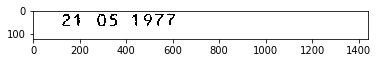

bad: 21 05 1977    True
eng: 21 05 197¢    False
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  165
rel: 21 05 1977


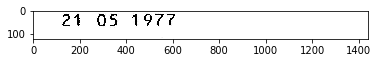

bad: 21 05 1977    True
eng: 21 05 1977    True
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  170
rel: 21 05 1977


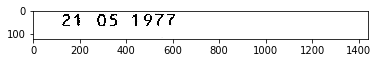

bad: 21 05 1977    True
eng: 21 05 1977    True
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  175
rel: 21 05 1977


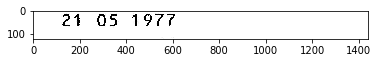

bad: 21 05 1977    True
eng: 21 05 1977    True
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  180
rel: 21 05 1977


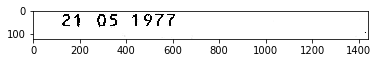

bad: 21 05 197¢    False
eng: 21 05 197¢    False
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  185
rel: 21 05 1977


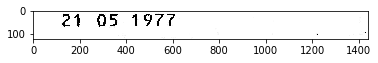

bad: 21 05 197¢    False
eng: 21 05 197¢    False
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  190
rel: 21 05 1977


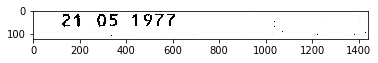

bad: 21 05 1977    True
eng: 21 05 1977    True
rus: 21 05 1977    True
bel: 21 05 1977    True
brightness_border is  195
rel: 21 05 1977


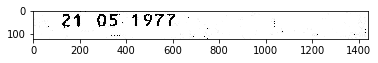

bad: — 24 05.1977 ©    False
eng: — 24 05.1977 ©    False
rus: 21 05 1977    True
bel: С. 2105 1977.    False


In [139]:
for brb in list(range(160, 200, 5)):
    print("brightness_border is ", brb)
    image_name = birth_date(brightness_border=brb)
    img = Image.open(image_name)
    plt_img=mpimg.imread(image_name)
    imgplot = plt.imshow(plt_img)
    best2 = "21 05 1977"
    print("rel:", best)
    plt.show()
    img.load()
    with PyTessBaseAPI() as api:
        api.SetImageFile(image_name)
        text = api.GetUTF8Text()[:-1]
        print("bad:", text, "  ", text == best)
    text1 = pytesseract.image_to_string(img, lang='eng')
    print("eng:", text1, "  ", text1 == best)
    text2 = pytesseract.image_to_string(img, lang='rus')
    print("rus:", text2, "  ", text2 == best)
    text3 = pytesseract.image_to_string(img, lang='bel')
    print("bel:", text3, "  ", text3 == best)
    